In [1]:
import pandas as pd
import glob
import os
import datetime
import pprint
pp = pprint.PrettyPrinter(indent=4)


In [2]:
sensorFolder = 'spl-deploy-rc3flr'

## Data Pre-Processing

In [3]:
#checking files in folder -- this notebook is in the same directory

"""
optional

"""
files = os.listdir('./'+sensorFolder)
pp.pprint(files)

[   '2022-06-09.csv',
    '2022-06-08.csv',
    '.DS_Store',
    '2022-05-29.csv',
    '2022-05-28.csv',
    '2022-05-26.csv',
    '2022-05-27.csv',
    '2022-05-25.csv',
    '2022-05-31.csv',
    '2022-05-19.csv',
    '2022-05-18.csv',
    '2022-05-30.csv',
    '2022-05-24.csv',
    '2022-05-20.csv',
    '2022-05-21.csv',
    '2022-05-23.csv',
    '2022-05-22.csv',
    '.ipynb_checkpoints',
    '2022-06-01.csv',
    '2022-06-03.csv',
    '2022-06-02.csv',
    '2022-06-12.csv',
    '2022-06-06.csv',
    '2022-06-07.csv',
    '2022-06-13.csv',
    '2022-06-05.csv',
    '2022-06-11.csv',
    '2022-06-10.csv',
    '2022-06-04.csv']


In [4]:
#selecting all the csv files
files = os.path.join(sensorFolder,"2022*.csv")

# list of merged files returned
files = glob.glob(files)

#sorting files by date
files.sort()
pp.pprint(files)

#checking a single file
print(files[0])

[   'spl-deploy-rc3flr/2022-05-18.csv',
    'spl-deploy-rc3flr/2022-05-19.csv',
    'spl-deploy-rc3flr/2022-05-20.csv',
    'spl-deploy-rc3flr/2022-05-21.csv',
    'spl-deploy-rc3flr/2022-05-22.csv',
    'spl-deploy-rc3flr/2022-05-23.csv',
    'spl-deploy-rc3flr/2022-05-24.csv',
    'spl-deploy-rc3flr/2022-05-25.csv',
    'spl-deploy-rc3flr/2022-05-26.csv',
    'spl-deploy-rc3flr/2022-05-27.csv',
    'spl-deploy-rc3flr/2022-05-28.csv',
    'spl-deploy-rc3flr/2022-05-29.csv',
    'spl-deploy-rc3flr/2022-05-30.csv',
    'spl-deploy-rc3flr/2022-05-31.csv',
    'spl-deploy-rc3flr/2022-06-01.csv',
    'spl-deploy-rc3flr/2022-06-02.csv',
    'spl-deploy-rc3flr/2022-06-03.csv',
    'spl-deploy-rc3flr/2022-06-04.csv',
    'spl-deploy-rc3flr/2022-06-05.csv',
    'spl-deploy-rc3flr/2022-06-06.csv',
    'spl-deploy-rc3flr/2022-06-07.csv',
    'spl-deploy-rc3flr/2022-06-08.csv',
    'spl-deploy-rc3flr/2022-06-09.csv',
    'spl-deploy-rc3flr/2022-06-10.csv',
    'spl-deploy-rc3flr/2022-06-11.csv',


In [ ]:
#getting total length of rows merged csv SHOULD be
"""
optional

"""
c = 0
for f in files:
    print(f)
    results = pd.read_csv(f)
    c+= len(results)
print(c)

In [5]:
print("Resultant CSV after joining all CSV files at a particular location...");
# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
         Unnamed: 0   laeq   lceq   lzeq          time
0                 0  64.35  72.85  73.29  1.652933e+09
1                 1  64.44  73.43  73.85  1.652933e+09
2                 2  64.08  72.59  73.08  1.652933e+09
3                 3  64.06  71.71  72.36  1.652933e+09
4                 4  63.41  71.62  72.22  1.652933e+09
...             ...    ...    ...    ...           ...
1930958         115  61.96  72.26  73.65  1.655093e+09
1930959         116  61.29  73.09  74.81  1.655093e+09
1930960         117  58.99  73.20  74.77  1.655093e+09
1930961         118  58.27  74.80  76.56  1.655093e+09
1930962         119  58.17  73.69  75.72  1.655093e+09

[1930963 rows x 5 columns]


In [6]:
#converting epoch time to datetime
df['time'] = df.time.apply(datetime.datetime.fromtimestamp)
# df['time'] = pd.to_datetime(df['time'], unit = 's')
df.rename(columns={'time': 'datetime'}, inplace=True)


In [7]:
#adding additional columns for datetime 

#extracting exact date
df['date'] = df['datetime'].dt.date

#extracting day of week
df['dayofweek'] = df['datetime'].dt.dayofweek
# df['dayofweek_name'] = df['datetime'].dt.day_name

#extracting extra data
# df['hour'] = df['datetime'].dt.hour
# df['min'] = df['datetime'].dt.minute
# df['sec'] = df['datetime'].dt.second

In [19]:
#checking file
print(df)


         Unnamed: 0   laeq   lceq   lzeq                datetime        date  \
0                 0  64.35  72.85  73.29 2022-05-18 23:59:16.155  2022-05-18   
1                 1  64.44  73.43  73.85 2022-05-18 23:59:16.898  2022-05-18   
2                 2  64.08  72.59  73.08 2022-05-18 23:59:18.392  2022-05-18   
3                 3  64.06  71.71  72.36 2022-05-18 23:59:19.126  2022-05-18   
4                 4  63.41  71.62  72.22 2022-05-18 23:59:19.871  2022-05-18   
...             ...    ...    ...    ...                     ...         ...   
1930958         115  61.96  72.26  73.65 2022-06-13 00:01:54.668  2022-06-13   
1930959         116  61.29  73.09  74.81 2022-06-13 00:01:56.150  2022-06-13   
1930960         117  58.99  73.20  74.77 2022-06-13 00:01:56.893  2022-06-13   
1930961         118  58.27  74.80  76.56 2022-06-13 00:01:57.638  2022-06-13   
1930962         119  58.17  73.69  75.72 2022-06-13 00:01:59.125  2022-06-13   

         dayofweek  
0                2

In [ ]:
#saving df to csv
#df.to_csv('masterdata.csv') uncomment to save file locally

## Analyzing Data

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [36]:
def getBasicStat(groupbyThisName):
    result = df.groupby(groupbyThisName).agg({'laeq': ['mean', 'min', 'max', 'std', 'median']})
    days = result.index
    means = result['laeq', 'mean']
    mins = result['laeq', 'min']
    maxs = result['laeq', 'max']
    stds = result['laeq', 'std']
    medians = result['laeq', 'median']
    
    
#     return result
    return days, means, mins, maxs, stds, medians;

In [70]:
z = df.groupby(pd.Grouper(key='datetime', freq='1min')).agg({'laeq': ['mean', 'min', 'max']})
# y = df.groupby(['datetime', '']).agg({'laeq': ['mean']})
print(x)
print(z)

# print(x.index.date)
# y = x.groupby(x.index.date)
# print(y)

                     Unnamed: 0       laeq       lceq       lzeq  dayofweek
datetime                                                                   
2022-05-18 15:32:00   21.500000  66.099091  75.445682  78.216818        2.0
2022-05-18 15:33:00   29.500000  65.966333  75.425833  76.168167        2.0
2022-05-18 15:34:00   29.500000  66.005500  74.630167  75.334333        2.0
2022-05-18 15:35:00   29.500000  65.437667  74.604500  75.171833        2.0
2022-05-18 15:36:00   29.500000  65.522500  75.182000  75.762000        2.0
...                         ...        ...        ...        ...        ...
2022-06-13 18:57:00   29.500000  63.218833  76.496167  78.069333        0.0
2022-06-13 18:58:00   30.000000  63.468136  75.765085  77.183729        0.0
2022-06-13 18:59:00   29.016393  62.991803  75.122459  76.447705        0.0
2022-06-13 19:00:00   29.500000  63.196833  76.182667  77.566500        0.0
2022-06-13 19:01:00   30.000000  63.750508  76.285424  77.651525        0.0

[37650 rows

In [91]:
# z.plot()

#### Time-Series: All Data 

In [57]:
DTdays, DTmeans, DTmins, DTmaxs, DTstds, DTmedians = getBasicStat(pd.Grouper(key='datetime', freq='10min'))
# DTdays, DTmeans, DTmins, DTmaxs, DTstds, DTmedians = getBasicStat('date')
# DTdays = DTdays.date

In [66]:
print(np.unique(DTdays.date))

[datetime.date(2022, 5, 18) datetime.date(2022, 5, 19)
 datetime.date(2022, 5, 20) datetime.date(2022, 5, 21)
 datetime.date(2022, 5, 22) datetime.date(2022, 5, 23)
 datetime.date(2022, 5, 24) datetime.date(2022, 5, 25)
 datetime.date(2022, 5, 26) datetime.date(2022, 5, 27)
 datetime.date(2022, 5, 28) datetime.date(2022, 5, 29)
 datetime.date(2022, 5, 30) datetime.date(2022, 5, 31)
 datetime.date(2022, 6, 1) datetime.date(2022, 6, 2)
 datetime.date(2022, 6, 3) datetime.date(2022, 6, 4)
 datetime.date(2022, 6, 5) datetime.date(2022, 6, 6)
 datetime.date(2022, 6, 7) datetime.date(2022, 6, 8)
 datetime.date(2022, 6, 9) datetime.date(2022, 6, 10)
 datetime.date(2022, 6, 11) datetime.date(2022, 6, 12)
 datetime.date(2022, 6, 13)]


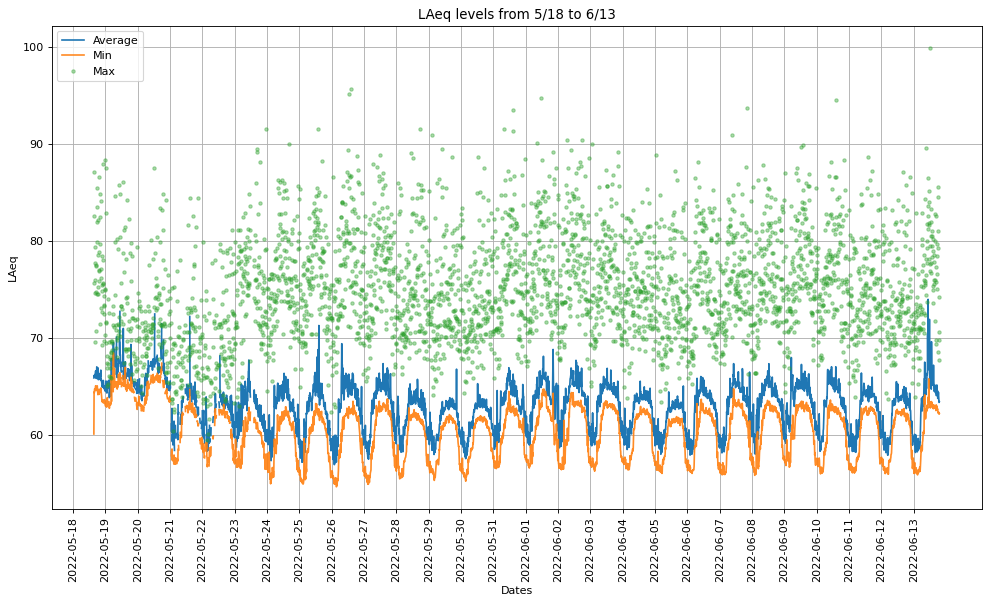

In [90]:
figure(figsize=(15, 8), dpi=80)
plt.plot(DTdays, DTmeans)
plt.plot(DTdays, DTmins, alpha = 0.9)
plt.plot(DTdays, DTmaxs, '.', alpha = .4)
# plt.plot(DTdays, DTmedians)
plt.xticks(np.unique(DTdays.date))  # Set text labels.
plt.xlabel('Dates')
plt.ylabel('LAeq')
plt.xticks(rotation = 90)
plt.title('LAeq levels from 5/18 to 6/13')
# plt.errorbar(DTdays, DTmeans, yerr = DTstds, c = 'c')
plt.legend(['Average','Min', 'Max'])
# plt.legend(['Average','Min', 'Max', 'Median'])
plt.grid(True)
plt.show()

#### Time Series: Day of Week

In [ ]:
DWdays, DWmeans, DWmins, DWmaxs, DWstds, DWmedians = getBasicStat('dayofweek')

In [ ]:
daysofweekDict = {DWdays[0]:'Monday', DWdays[1]: 'Tuesday', DWdays[2]: 'Wednesday', DWdays[3]: 'Thursday', 
                  DWdays[4]: 'Friday', DWdays[5]: 'Saturday', DWdays[6]: 'Sunday'}

DWlabels = list(daysofweekDict.values())

In [ ]:
figure(figsize=(10, 8), dpi=80)
plt.plot(DWlabels, DWmeans, '.-', c = 'r')
plt.plot(DWlabels, DWmins, '.-', c = 'm')
plt.plot(DWlabels, DWmaxs, '.-', c = 'b')
plt.plot(DWlabels, DWmedians)

plt.xlabel('Days of the Week')
plt.ylabel('LAeq')
# plt.yticks(np.linspace(round(min(mins)-1), np.ceil(max(maxs)),10, dtype=int))
# plt.xticks(rotation = 90)
plt.title('LAeq levels by Day of Week')
plt.errorbar(DWlabels, DWmeans, yerr = DWstds, c = 'r')
plt.legend(['Average','Min', 'Max', 'Median'])
plt.grid(True)
plt.show()

#### Heat Map: Average Hourly LAeq Levels per Day of Week

In [ ]:
import seaborn as sns

In [ ]:
df['hour'] = df['datetime'].dt.hour

In [ ]:
# result = df.groupby(['hour', 'dayofweek']).agg({'laeq': ['mean', 'min', 'max', 'std', 'median']})
laeq_mean = df.groupby(['hour', 'dayofweek']).agg({'laeq': ['mean']})
# print(laeq_mean)

df2 = laeq_mean.reset_index().pivot(columns='dayofweek',index='hour',values={'laeq': ['mean']})
# print(df2)

fig, ax = plt.subplots(figsize=(5, 7))
hm = sns.heatmap(df2, vmin = 55, vmax = 70, linewidths=.5,cmap='OrRd');
hm.invert_yaxis()
hm.set_xticks(np.arange(len(DWlabels)))
hm.set_xticklabels(DWlabels, rotation=45)

plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.title(' Time Series: Average Hourly LAeq Levels per Day of Week Heat Map')

In [ ]:
# DWxHRdays, DWxHRmeans, DWxHRmins, DWxHRmaxs, DWxHRstds, DWxHRmedians = getBasicStat(['hour', 'dayofweek'])

#### Heat Map: LAeq Levels by Time of Day per Day of Week

In [ ]:
# df.set_index('datetime',inplace=True) #JUST NEED TO RUN THIS ONE TIME
x = df.resample('6H').mean();
# print(x)
# print(x.index.hour)
x['hour'] = x.index.hour;
DF = x.groupby(['dayofweek', 'hour']).agg({'laeq': ['mean']})

In [ ]:
print(DF)

In [ ]:
hours_ref=x['hour']
hourlist1=hours_ref.unique().tolist()
hrlist = sorted(hourlist1)

timeofdayDict = {hrlist[0]: 'Early Morning (12am-6am)', 
                 hrlist[1]: 'Morning (6am-12pm)', 
                 hrlist[2]: 'Afternoon (12pm-6pm)', 
                 hrlist[3]: 'Night (6pm-12am)'}

TDlabels = list(timeofdayDict.values())
print(timeofdayDict)

In [ ]:
y = x.reset_index().pivot_table(index='hour', columns='dayofweek', values='laeq', aggfunc='mean')
print(y)

In [ ]:
y = x.reset_index().pivot_table(index='hour', columns='dayofweek', values='laeq', aggfunc='mean')

# df3 = x.reset_index().pivot(columns='dayofweek',index='hour',values={'laeq': ['mean']})

# print(df2)

fig, ax = plt.subplots(figsize=(5, 7))
hm = sns.heatmap(y, annot=True, vmin = 55, vmax = 70, linewidths=.5,cmap='Blues');
hm.invert_yaxis()
hm.set_yticks(np.arange(len(TDlabels)))
hm.set_yticklabels(TDlabels, rotation=0)
hm.set_xticks(np.arange(len(DWlabels)))
hm.set_xticklabels(DWlabels, rotation=90)

plt.title(' LAeq Levels by Time of Day per Day of Week Heat Map')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
